In [2]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import geojson
import geopandas as gpd
from bs4 import BeautifulSoup 
import io
import zipfile
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.express as px
import seaborn as sns

* ## Campeonato Nacional **2010-2011**

In [3]:
url = 'https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_Chile_2010'
respuesta = requests.get(url).text

soup = BeautifulSoup(respuesta)
info = soup.find('body',{'class':'mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject mw-editable page-Primera_División_de_Chile_2010 rootpage-Primera_División_de_Chile_2010 skin-vector action-view skin-vector-legacy'})
tabla = info.find('div',{'id':'content'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'class':'wikitable'})[3].find('tbody')
equipos = tabla.find_all('tr')[1::]
aux = []

for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(10)]
    aux.append(col)

df_2010 = pd.DataFrame(aux, columns=['POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])

df_2010['EQUIPO'] = df_2010['EQUIPO'].replace('San Luis','San Luis de Quillota')

df_2010['PTS']=df_2010['PTS'].astype(int)
df_2010['PJ']=df_2010['PJ'].astype(int)
df_2010['PG']=df_2010['PG'].astype(int)
df_2010['PE']=df_2010['PE'].astype(int)
df_2010['PP']=df_2010['PP'].astype(int)
df_2010['GF']=df_2010['GF'].astype(int)
df_2010['GC']=df_2010['GC'].astype(int)


df_2010=df_2010.set_index(['POS'])
df_2010=df_2010.replace('Colo-Colo 1','Colo-Colo')


* ## Campeonato Nacional **2011-2012**

In [4]:
url = 'https://es.wikipedia.org/wiki/Torneo_Clausura_2011_(Chile)'
respuesta = requests.get(url).text

soup = BeautifulSoup(respuesta)
body = body=soup.find('body',{'class':'mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject mw-editable page-Torneo_Clausura_2011_Chile rootpage-Torneo_Clausura_2011_Chile skin-vector action-view skin-vector-legacy'}).find('div',{'id':'content'}).find('div',{'id':'bodyContent'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'align':'center','style':'font-size: 90%; border-collapse:collapse'})
equipos=body[1].find_all('tr')[1::]
aux = []

for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(11)]
    aux.append(col)

df_2011 = pd.DataFrame(aux, columns=['I','POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2011=df_2011.drop(columns='I')

df_2011['PTS']=df_2011['PTS'].astype(int)
df_2011['PJ']=df_2011['PJ'].astype(int)
df_2011['PG']=df_2011['PG'].astype(int)
df_2011['PE']=df_2011['PE'].astype(int)
df_2011['PP']=df_2011['PP'].astype(int)
df_2011['GF']=df_2011['GF'].astype(int)
df_2011['GC']=df_2011['GC'].astype(int)


df_2011=df_2011.set_index(['POS'])


df_2011=df_2011.replace('Colo-Colo[2]​','Colo-Colo')
df_2011=df_2011.reindex(columns=['EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])


* ## Campeonato Nacional **2012-2013**

In [5]:
url = 'https://es.wikipedia.org/wiki/Torneo_Clausura_2012_(Chile)'
respuesta = requests.get(url).text
aux=[]
soup = BeautifulSoup(respuesta)
body =soup.find('body').find('div',{'id':'content'}).find('div',{'id':'bodyContent','class':'vector-body'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'style':'text-align: center;'})[1].find('tbody')
equipos=body.find_all('tr')[1::]

for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(11)]
    aux.append(col)

df_2012 = pd.DataFrame(aux, columns=['I','POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2012=df_2012.drop(columns='I')

df_2012['PTS']=df_2012['PTS'].astype(int)
df_2012['PJ']=df_2012['PJ'].astype(int)
df_2012['PG']=df_2012['PG'].astype(int)
df_2012['PE']=df_2012['PE'].astype(int)
df_2012['PP']=df_2012['PP'].astype(int)
df_2012['GF']=df_2012['GF'].astype(int)
df_2012['GC']=df_2012['GC'].astype(int)

df_2012['EQUIPO']=df_2012['EQUIPO'].replace('Unión Española[5]​','Unión Española')

df_2012=df_2012.set_index(['POS'])


* ## Campeonato Nacional **2013-2014**

In [6]:
url = 'https://es.wikipedia.org/wiki/Temporada_2013-2014_del_f%C3%BAtbol_chileno'
respuesta = requests.get(url).text
aux=[]
soup = BeautifulSoup(respuesta)
body=soup.find('body').find('div',{'id':'content'}).find('div',{'id':'bodyContent'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'style':'font-size: 90%; border-collapse:collapse'})[2]
equipos=body.find_all('tr')[1::]
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(11)]
    aux.append(col)

df_2013 = pd.DataFrame(aux, columns=['I','POS','EQUIPO','PJ','PG','PE','PP','GF','GC','DIF','PTS'])
df_2013=df_2013.drop(columns='I')

df_2013['PTS']=df_2013['PTS'].astype(int)
df_2013['PJ']=df_2013['PJ'].astype(int)
df_2013['PG']=df_2013['PG'].astype(int)
df_2013['PE']=df_2013['PE'].astype(int)
df_2013['PP']=df_2013['PP'].astype(int)
df_2013['GF']=df_2013['GF'].astype(int)
df_2013['GC']=df_2013['GC'].astype(int)

df_2013=df_2013.set_index(['POS'])
df_2013=df_2013.reindex(columns=['EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2013['EQUIPO']=df_2013['EQUIPO'].replace('U. de Concepción','Universidad de Concepción')



* ## Campeonato Nacional **2014-2015**

In [7]:
url = 'https://es.wikipedia.org/wiki/Torneo_Clausura_2015_(Chile)'
respuesta = requests.get(url).text
aux=[]
soup = BeautifulSoup(respuesta)
body=soup.find('body').find('div',{'id':'content'}).find('div',{'id':'bodyContent'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'style':'font-size: 90%; border-collapse:collapse'})[0].find('tbody')
equipos=body.find_all('tr')[1::]
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(11)]
    aux.append(col)

df_2014 = pd.DataFrame(aux, columns=['I','POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2014=df_2014.drop(columns='I')

df_2014['PTS']=df_2014['PTS'].astype(int)
df_2014['PJ']=df_2014['PJ'].astype(int)
df_2014['PG']=df_2014['PG'].astype(int)
df_2014['PE']=df_2014['PE'].astype(int)
df_2014['PP']=df_2014['PP'].astype(int)
df_2014['GF']=df_2014['GF'].astype(int)
df_2014['GC']=df_2014['GC'].astype(int)


df_2014=df_2014.set_index(['POS'])
df_2014=df_2014.reindex(columns=['EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2014['EQUIPO']=df_2014['EQUIPO'].replace('Cobreloa[2]​','Cobreloa')



* ## Campeonato Nacional **2015-2016**

In [8]:
url = 'https://es.wikipedia.org/wiki/Torneo_Clausura_2016_(Chile)'
respuesta = requests.get(url).text
aux=[]
soup = BeautifulSoup(respuesta)
body=soup.find('body').find('div',{'id':'content'}).find('div',{'id':'bodyContent'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'style':'text-align: center; font-size: 90%;'})[1].find('tbody')
equipos=body.find_all('tr')[1::]

for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(11)]
    aux.append(col)

df_2015 = pd.DataFrame(aux, columns=['I','POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2015=df_2015.drop(columns='I')

df_2015['PTS']=df_2015['PTS'].astype(int)
df_2015['PJ']=df_2015['PJ'].astype(int)
df_2015['PG']=df_2015['PG'].astype(int)
df_2015['PE']=df_2015['PE'].astype(int)
df_2015['PP']=df_2015['PP'].astype(int)
df_2015['GF']=df_2015['GF'].astype(int)
df_2015['GC']=df_2015['GC'].astype(int)


df_2015=df_2015.set_index(['POS'])
df_2015=df_2015.reindex(columns=['EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])


* ## Campeonato Nacional **2016-2017**

In [9]:
url = 'https://es.wikipedia.org/wiki/Torneo_Clausura_2017_(Chile)'
respuesta = requests.get(url).text
aux=[]
soup = BeautifulSoup(respuesta)
body=soup.find('body').find('div',{'id':'content'}).find('div',{'id':'bodyContent'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'style':'text-align: center; font-size: 90%;'})[1].find('tbody')
equipos=body.find_all('tr')[1::]

for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(11)]
    aux.append(col)

df_2016 = pd.DataFrame(aux, columns=['POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF','I'])
df_2016=df_2016.drop(columns='I')

df_2016['PTS']=df_2016['PTS'].astype(int)
df_2016['PJ']=df_2016['PJ'].astype(int)
df_2016['PG']=df_2016['PG'].astype(int)
df_2016['PE']=df_2016['PE'].astype(int)
df_2016['PP']=df_2016['PP'].astype(int)
df_2016['GF']=df_2016['GF'].astype(int)
df_2016['GC']=df_2016['GC'].astype(int)


df_2016=df_2016.set_index(['POS'])
df_2016=df_2016.reindex(columns=['EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2016['EQUIPO']=df_2016['EQUIPO'].replace('Cobresal (D)','Cobresal')
df_2016['EQUIPO'] = df_2016['EQUIPO'].replace('San Luis','San Luis de Quillota')



* ## Campeonato Nacional **2017-2018**

In [10]:
url = 'https://es.wikipedia.org/wiki/Torneo_de_Transici%C3%B3n_2017_(Chile)'
respuesta = requests.get(url).text
aux=[]
soup = BeautifulSoup(respuesta)
body=soup.find('body').find('div',{'id':'content'}).find('div',{'id':'bodyContent'}).find('div',{'id':'mw-content-text'}).find('div',{'class':'mw-parser-output'}).find_all('table',{'style':'background: #F9F9F9; text-align: center; font-size: 90%; border-collapse:collapse'})[0].find('tbody')
equipos=body.find_all('tr')[1::]

for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(len(columna))]
    aux.append(col)

df_2017 = pd.DataFrame(aux, columns=['POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])

df_2017 = df_2017.set_index(['POS'])
df_2017=df_2017.dropna()

df_2017['PTS']=df_2017['PTS'].astype(int)
df_2017['PJ']=df_2017['PJ'].astype(int)
df_2017['PG']=df_2017['PG'].astype(int)
df_2017['PE']=df_2017['PE'].astype(int)
df_2017['PP']=df_2017['PP'].astype(int)
df_2017['GF']=df_2017['GF'].astype(int)
df_2017['GC']=df_2017['GC'].astype(int)

df_2017['EQUIPO']=df_2017['EQUIPO'].replace('Colo-Colo[n. 1]​','Colo-Colo')
df_2017['EQUIPO']=df_2017['EQUIPO'].replace('Universidad de Chile[n. 2]​','Universidad de Chile')
df_2017['EQUIPO']=df_2017['EQUIPO'].replace('Santiago Wanderers[n. 3]​','Santiago Wanderers')
df_2017['EQUIPO'] = df_2017['EQUIPO'].replace('San Luis','San Luis de Quillota')

In [11]:
url_campeonato_2018 = 'https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_Chile_2018'
respuesta = requests.get(url_campeonato_2018).text

soup_campeonato_2018 = BeautifulSoup(respuesta)
# Se encuentra la tabla de posiciones de los equipos mediante el metodo find y find_all de bs4
informacion_posiciones = soup_campeonato_2018.find('div', class_='mw-parser-output').find('table',{'align':'center'})
equipos = informacion_posiciones.find_all('tr')[1::]
len(equipos)

# Se eliminan los indices que no tienen relación a la información buscada
equipos.pop(16)

# Se genera el df de las posiciones de los equipos
aux = []
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(10)]
    aux.append(col)
df_2018 = pd.DataFrame(aux, columns=['POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2018=df_2018.set_index('POS')

df_2018['PTS']=df_2018['PTS'].astype(int)
df_2018['PJ']=df_2018['PJ'].astype(int)
df_2018['PG']=df_2018['PG'].astype(int)
df_2018['PE']=df_2018['PE'].astype(int)
df_2018['PP']=df_2018['PP'].astype(int)
df_2018['GF']=df_2018['GF'].astype(int)
df_2018['GC']=df_2018['GC'].astype(int)

df_2018['EQUIPO']=df_2018['EQUIPO'].replace('Universidad Católica (C)','Universidad Católica')
df_2018['EQUIPO']=df_2018['EQUIPO'].replace('Deportes Temuco (D)','Deportes Temuco')
df_2018['EQUIPO']=df_2018['EQUIPO'].replace('San Luis (D)','San Luis de Quillota')


In [12]:
url_campeonato_2019 = 'https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_Chile_2019'
respuesta = requests.get(url_campeonato_2019).text

soup_campeonato_2019 = BeautifulSoup(respuesta)
# Se encuentra la tabla de posiciones de los equipos mediante el metodo find y find_all de bs4
informacion_posiciones = soup_campeonato_2019.find('div', class_='mw-parser-output').find_all('table',{'align':'center'})[1]
equipos = informacion_posiciones.find_all('tr')[1::]
equipos

# Se eliminan los indices que no tienen relación a la información buscada
equipos.pop(16)

# Se genera el df de las posiciones de los equipos
aux = []
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(10)]
    aux.append(col)

df_2019 = pd.DataFrame(aux, columns=['POS','EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2019['PTS']=df_2019['PTS'].astype(int)
df_2019['PJ']=df_2019['PJ'].astype(int)
df_2019['PG']=df_2019['PG'].astype(int)
df_2019['PE']=df_2019['PE'].astype(int)
df_2019['PP']=df_2019['PP'].astype(int)
df_2019['GF']=df_2019['GF'].astype(int)
df_2019['GC']=df_2019['GC'].astype(int)

df_2019=df_2019.set_index('POS')

* ## Campeonato Nacional **2020**

In [13]:
url_campeonato_2020 = 'https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_Chile_2020'
respuesta = requests.get(url_campeonato_2020).text

soup_campeonato_2020 = BeautifulSoup(respuesta)
# Se encuentra la tabla de posiciones de los equipos mediante el metodo find y find_all de bs4
informacion_posiciones = soup_campeonato_2020.find('div', class_='mw-parser-output').find_all('table',{'align':'center'})[1]
equipos = informacion_posiciones.find_all('tr')[1::]

# # Se eliminan los indices que no tienen relación a la información buscada
# equipos.pop(16)

# Se genera el df de las posiciones de los equipos
aux = []
for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(9)]
    aux.append(col)


df_2020 = pd.DataFrame(aux, columns=['EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','DIF'])
df_2020['PTS']=df_2020['PTS'].astype(int)
df_2020['PJ']=df_2020['PJ'].astype(int)
df_2020['PG']=df_2020['PG'].astype(int)
df_2020['PE']=df_2020['PE'].astype(int)
df_2020['PP']=df_2020['PP'].astype(int)
df_2020['GF']=df_2020['GF'].astype(int) 
df_2020['GC']=df_2020['GC'].astype(int)


---

In [14]:
dataframes_list = [df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020]
df_decada=pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020],axis=0)

df_decada=df_decada.drop(columns='DIF')

df_decada['PTS']=df_decada['PTS'].astype(int)
df_decada['PJ']=df_decada['PJ'].astype(int)
df_decada['PG']=df_decada['PG'].astype(int)
df_decada['PE']=df_decada['PE'].astype(int)
df_decada['PP']=df_decada['PP'].astype(int)
df_decada['GF']=df_decada['GF'].astype(int) 
df_decada['GC']=df_decada['GC'].astype(int)

df_decada = df_decada.groupby(by='EQUIPO').agg({'PTS':'sum','PJ':'sum','PG':'sum','PE':'sum','PP':'sum','GF':'sum','GC':'sum'})

df_decada=df_decada.sort_values(by='PTS',ascending=False)
#devido a la mala cuenta de un partido extra "definitorio", regularemos este dato en base a los partidos maximos
df_decada['PJ']=df_decada['PJ'].replace(334,333)
df_decada=df_decada.reset_index()
df_decada

,EQUIPO,PTS,PJ,PG,PE,PP,GF,GC
0,Universidad Católica,621,333,181,78,74,617,377
1,Colo-Colo,591,333,172,75,86,550,380
2,Universidad de Chile,575,333,163,86,84,607,414
3,Unión Española,502,333,138,88,108,527,470
4,O'Higgins,490,333,136,82,115,471,432
5,Palestino,464,333,125,89,119,459,454
6,Audax Italiano,451,333,119,94,120,499,492
7,Universidad de Concepción,437,333,113,98,122,413,445
8,Huachipato,436,333,116,88,129,447,467
9,Deportes Iquique,383,300,98,90,113,394,450


### Veamos un elemento grafico en representacion de la cantidad de puntos obtenidos por cada equipo


In [15]:
import plotly.graph_objects as go

figure_config=dict({"data":[{"type":"bar","x":df_decada.EQUIPO,"y":df_decada['PTS']}],
                    "layout":{"title":{"text":"Puntos Acumulados 2010 - 2020","x":0.5,"font":{"color":"black","size":20}}}
                   })
fig=go.Figure(figure_config)
fig.show()

In [16]:
url = 'https://es.wikipedia.org/wiki/Anexo:Estadios_de_f%C3%BAtbol_de_Chile'
respuesta = requests.get(url).text

soup = BeautifulSoup(respuesta)
body = soup.find('body').find('div',{'id':'content'}).find('div',{'id':'bodyContent'}).find('div',{'id':'mw-content-text','class':'mw-body-content mw-content-ltr'}).find('div',{'class':'mw-parser-output'}).find('table')
equipos = body.find_all('tr')[1::]
aux = []

for rows in equipos:
    columna = rows.find_all('td')
    col = [columna[i].text.strip() for i in range(8)]
    aux.append(col)

df_estadios = pd.DataFrame(aux, columns=['N','Img','Nombre','LOC','Region','Equipo','apertura','capacidad'])
df_estadios = df_estadios.set_index('N')
df_estadios = df_estadios.drop(columns='Img')
df_estadios['apertura'] = df_estadios['apertura'].replace('-----',np.NAN)
aux_2=[]
for cantidad in df_estadios.capacidad:
    if len(cantidad) > 6:
        cantidad= cantidad[:6]
    aux_2.append(cantidad)
df_estadios.capacidad=aux_2
df_estadios

,Nombre,LOC,Region,Equipo,apertura,capacidad
N,,,,,,
1,Estadio Nacional Julio Martínez Prádanos,Santiago (Ñuñoa),Metropolitana,Selección de fútbol de Chile Universidad de C...,1938(2010),48 665
2,Estadio Monumental David Arellano,Santiago (Macul),Metropolitana,Colo-Colo,1975(1989),47 347
3,Estadio Ester Roa Rebolledo,Concepción,Biobío,Deportes Concepción Universidad de Concepción...,1962(2015),30 448
4,Estadio Sausalito,Viña del Mar,Valparaíso,Everton,1929(2015),23 423
5,Estadio Regional Calvo y Bascuñán,Antofagasta,Antofagasta,Deportes Antofagasta,1964(2013),21 178
6,Estadio Elías Figueroa Brander,Valparaíso,Valparaíso,Santiago Wanderers,1931(2014),20 575
7,Estadio Santa Laura - Universidad SEK,Santiago (Independencia),Metropolitana,Unión Española,1923(2008),19 000
8,Estadio Francisco Sánchez Rumoroso,Coquimbo,Coquimbo,Coquimbo Unido,1970(2008),18 750
9,Estadio Germán Becker,Temuco,La Araucanía,Deportes Temuco,1965(2008),18 413


In [17]:
publico_2018 = pd.read_csv('Asistentes_estadio/publico_2018.csv')
publico_2018;

In [18]:
publico_2019 = pd.read_csv('Asistentes_estadio/publico_2019.csv')
publico_2019;

In [19]:
publico_2020 = pd.read_csv('Asistentes_estadio/publico_2020.csv')
publico_2020;

In [20]:
df_publico = pd.concat([publico_2018, publico_2019],axis=0)

df_publico['Año'] = df_publico['Año'].astype(int)
df_publico['Capacidad'] = df_publico['Capacidad'].astype(int)
df_publico['Espectadores'] = df_publico['Espectadores'].astype(int)
df_publico['Promedio'] = df_publico['Promedio'].astype(int)
df_publico['Partidos'] = df_publico['Partidos'].astype(int)
df_publico['Porcentaje asistencia'] = df_publico['Porcentaje asistencia'].astype(float)

df_publico = df_publico.groupby(by='Equipo').agg({'Espectadores':'sum','Promedio':'sum','Partidos':'sum','Porcentaje asistencia':'mean'})

df_publico = df_publico.sort_values(by='Espectadores',ascending=False)
df_publico = df_publico.reset_index()
df_publico.head()


,Equipo,Espectadores,Promedio,Partidos,Porcentaje asistencia
0,Universidad de Chile,764967,56222,27,57.80
1,Colo-colo,643883,49529,26,52.30
2,Universdad Católica,277922,21257,26,72.00
3,O'Higgins,158198,11630,27,40.25
4,Universdad de Concepción,119958,9564,25,15.75


### Veamos los ingresos de los equipos por ventas de jugadores

In [21]:
t_2010 = pd.read_csv('Transferencias/transferencias_2010.csv', dtype='str')
t_2010['Ingresos'] = t_2010['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2010['Gastos'] = t_2010['Gastos'].str.replace('.','').astype(int)
t_2010['Balance Total'] = t_2010['Balance Total'].str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2010['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2010['Equipos'] = remplazo


In [22]:
t_2011 = pd.read_csv('Transferencias/transferencias_2011.csv', dtype='str')
t_2011['Ingresos'] = t_2011['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2011['Gastos'] = t_2011['Gastos'].astype(str).str.replace('.','').astype(int)
t_2011['Balance Total'] = t_2011['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2011['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2011['Equipos'] = remplazo

In [23]:
t_2012 = pd.read_csv('Transferencias/transferencias_2012.csv', dtype='str')
t_2012['Ingresos'] = t_2012['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2012['Gastos'] = t_2012['Gastos'].astype(str).str.replace('.','').astype(int)
t_2012['Balance Total'] = t_2012['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2012['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2012['Equipos'] = remplazo

In [24]:
t_2013 = pd.read_csv('Transferencias/transferencias_2013.csv', dtype='str')
t_2013['Ingresos'] = t_2013['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2013['Gastos'] = t_2013['Gastos'].astype(str).str.replace('.','').astype(int)
t_2013['Balance Total'] = t_2013['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2013['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2013['Equipos'] = remplazo

In [25]:
t_2014 = pd.read_csv('Transferencias/transferencias_2014.csv', dtype='str')
t_2014['Ingresos'] = t_2014['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2014['Gastos'] = t_2014['Gastos'].astype(str).str.replace('.','').astype(int)
t_2014['Balance Total'] = t_2014['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2014['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2014['Equipos'] = remplazo

In [26]:
t_2015 = pd.read_csv('Transferencias/transferencias_2015.csv', dtype='str')
t_2015['Ingresos'] = t_2015['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2015['Gastos'] = t_2015['Gastos'].astype(str).str.replace('.','').astype(int)
t_2015['Balance Total'] = t_2015['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2015['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2015['Equipos'] = remplazo

In [27]:
t_2016 = pd.read_csv('Transferencias/transferencias_2016.csv', dtype='str')
t_2016['Ingresos'] = t_2016['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2016['Gastos'] = t_2016['Gastos'].astype(str).str.replace('.','').astype(int)
t_2016['Balance Total'] = t_2016['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2016['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2016['Equipos'] = remplazo

In [28]:
t_2017 = pd.read_csv('Transferencias/transferencias_2017.csv', dtype='str')
t_2017['Ingresos'] = t_2017['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2017['Gastos'] = t_2017['Gastos'].astype(str).str.replace('.','').astype(int)
t_2017['Balance Total'] = t_2017['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2017['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2017['Equipos'] = remplazo

In [29]:
t_2018 = pd.read_csv('Transferencias/transferencias_2018.csv', dtype='str')
t_2018['Ingresos'] = t_2018['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2018['Gastos'] = t_2018['Gastos'].astype(str).str.replace('.','').astype(int)
t_2018['Balance Total'] = t_2018['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2018['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2018['Equipos'] = remplazo

In [30]:
t_2019 = pd.read_csv('Transferencias/transferencias_2019.csv', dtype='str')
t_2019['Ingresos'] = t_2019['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2019['Gastos'] = t_2019['Gastos'].astype(str).str.replace('.','').astype(int)
t_2019['Balance Total'] = t_2019['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2019['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2019['Equipos'] = remplazo

In [31]:
t_2020 = pd.read_csv('Transferencias/transferencias_2020.csv', dtype='str')
t_2020['Ingresos'] = t_2020['Ingresos'].astype(str).str.replace('.','').astype(int)
t_2020['Gastos'] = t_2020['Gastos'].astype(str).str.replace('.','').astype(int)
t_2020['Balance Total'] = t_2020['Balance Total'].astype(str).str.replace('.','').astype(int)

remplazo=[]
for equipo in t_2020['Equipos']:
    equipo = equipo.replace('CD','')
    equipo = equipo.replace('CSD','')
    equipo =equipo.replace('CDP','')
    equipo =equipo.strip()
    remplazo.append(equipo)
t_2020['Equipos'] = remplazo

In [32]:
df_decada_t=pd.concat([t_2010,t_2011,t_2012,t_2013,t_2014,t_2015,t_2016,t_2017,t_2018,t_2019,t_2020],axis=0)
df_decada_t=df_decada_t.rename({'Equipos':'EQUIPO',
'Ingresos':'Ingresos'.upper(),
'Gastos':'Gastos'.upper(),
'Balance Total':'Balance Total'.upper()},axis=1)
df_decada_t = df_decada_t.groupby(by='EQUIPO').agg({'INGRESOS':'sum','GASTOS':'sum','BALANCE TOTAL':'sum'}).reset_index()

df_decada_t['EQUIPO']=df_decada_t['EQUIPO'].replace('Club Deportes Iquique','Deportes Iquique')
df_decada_t['EQUIPO']=df_decada_t['EQUIPO'].replace('Club Deportivo Huachipato','Huachipato')
df_decada_t['EQUIPO']=df_decada_t['EQUIPO'].replace('Club de Deportes Antofagasta','Deportes Antofagasta')
df_decada_t['EQUIPO']=df_decada_t['EQUIPO'].replace('Deportes Cobreloa','Cobreloa')
df_decada_t['EQUIPO']=df_decada_t['EQUIPO'].replace('P Curicó Unido','Curicó Unido')
df_decada_t['EQUIPO']=df_decada_t['EQUIPO'].replace('Colo Colo','Colo-Colo')
df_decada_t['EQUIPO']=df_decada_t['EQUIPO'].replace('Universidad Concepción','Universidad de Concepción')
df_decada_t['BALANCE TOTAL'] = df_decada_t['INGRESOS']-df_decada_t['GASTOS']
df_decada_t


,EQUIPO,INGRESOS,GASTOS,BALANCE TOTAL
0,Audax Italiano,17327000,0,17327000
1,Deportes Iquique,1310000,0,1310000
2,Huachipato,10260000,4330000,5930000
3,Deportes Antofagasta,1687000,484000,1203000
4,Cobresal,0,265000,-265000
5,Colo-Colo,35208000,14275000,20933000
6,Coquimbo Unido,315000,0,315000
7,Cobreloa,1150000,0,1150000
8,Deportes La Serena,164000,0,164000
9,Deportes Temuco,0,0,0


In [33]:
pt2 = df_decada.merge(df_decada_t,on='EQUIPO',how='outer').replace(np.nan,0)
pt2

,EQUIPO,PTS,PJ,PG,PE,PP,GF,GC,INGRESOS,GASTOS,BALANCE TOTAL
0,Universidad Católica,621,333,181,78,74,617,377,23505000.0,7085000.0,16420000.0
1,Colo-Colo,591,333,172,75,86,550,380,35208000.0,14275000.0,20933000.0
2,Universidad de Chile,575,333,163,86,84,607,414,10750000.0,9520000.0,1230000.0
3,Unión Española,502,333,138,88,108,527,470,12360000.0,450000.0,11910000.0
4,O'Higgins,490,333,136,82,115,471,432,4044000.0,1022000.0,3022000.0
5,Palestino,464,333,125,89,119,459,454,5278000.0,1060000.0,4218000.0
6,Audax Italiano,451,333,119,94,120,499,492,17327000.0,0.0,17327000.0
7,Universidad de Concepción,437,333,113,98,122,413,445,2700000.0,596000.0,2104000.0
8,Huachipato,436,333,116,88,129,447,467,10260000.0,4330000.0,5930000.0
9,Deportes Iquique,383,300,98,90,113,394,450,1310000.0,0.0,1310000.0


In [34]:
df_estadios = pd.read_csv('Estadios/csv_estadios.csv')
df_estadios = df_estadios.drop(['N'], axis=1)

gpd_estadios = gpd.GeoDataFrame(df_estadios, geometry= gpd.points_from_xy(df_estadios.longitud, df_estadios.latitud))
gpd_estadios = gpd_estadios.rename({'Equipo':'EQUIPO','Nombre':'ESTADIO','LOC':'CIUDAD','Region':'REGION','capacidad':'CAPACIDAD'},axis=1).drop(columns='apertura')
gpd_estadios.head()

,ESTADIO,CIUDAD,REGION,EQUIPO,CAPACIDAD,latitud,longitud,geometry
0,Estadio Nacional Julio Martínez Prádanos,Santiago (Ñuñoa),Metropolitana,Universidad de Chile,48 665,-33.464522,-70.610586,POINT (-70.61059 -33.46452)
1,Estadio Monumental David Arellano,Santiago (Macul),Metropolitana,Colo-Colo,47 347,-33.506611,-70.605944,POINT (-70.60594 -33.50661)
2,Estadio Ester Roa Rebolledo,Concepción,Biobío,Universidad de Concepción,30 448,-36.815278,-73.023333,POINT (-73.02333 -36.81528)
3,Estadio Sausalito,Viña del Mar,Valparaíso,Everton,23 423,-33.014444,-71.535000,POINT (-71.53500 -33.01444)
4,Estadio Regional Calvo y Bascuñán,Antofagasta,Antofagasta,Deportes Antofagasta,21 178,-23.670139,-70.404583,POINT (-70.40458 -23.67014)


In [35]:
gpd_equipos = gpd_estadios.merge(pt2,on='EQUIPO',how='inner')
gpd_equipos.head()

,ESTADIO,CIUDAD,REGION,EQUIPO,CAPACIDAD,latitud,longitud,geometry,PTS,PJ,PG,PE,PP,GF,GC,INGRESOS,GASTOS,BALANCE TOTAL
0,Estadio Nacional Julio Martínez Prádanos,Santiago (Ñuñoa),Metropolitana,Universidad de Chile,48 665,-33.464522,-70.610586,POINT (-70.61059 -33.46452),575,333,163,86,84,607,414,10750000.0,9520000.0,1230000.0
1,Estadio Monumental David Arellano,Santiago (Macul),Metropolitana,Colo-Colo,47 347,-33.506611,-70.605944,POINT (-70.60594 -33.50661),591,333,172,75,86,550,380,35208000.0,14275000.0,20933000.0
2,Estadio Ester Roa Rebolledo,Concepción,Biobío,Universidad de Concepción,30 448,-36.815278,-73.023333,POINT (-73.02333 -36.81528),437,333,113,98,122,413,445,2700000.0,596000.0,2104000.0
3,Estadio Sausalito,Viña del Mar,Valparaíso,Everton,23 423,-33.014444,-71.535000,POINT (-71.53500 -33.01444),237,201,59,60,82,230,284,1230000.0,0.0,1230000.0
4,Estadio Regional Calvo y Bascuñán,Antofagasta,Antofagasta,Deportes Antofagasta,21 178,-23.670139,-70.404583,POINT (-70.40458 -23.67014),335,265,86,77,102,322,350,1687000.0,484000.0,1203000.0


In [36]:
gpd_equipos = gpd_equipos.loc[:,['EQUIPO','PTS','PJ','PG','PE','PP','GF','GC','INGRESOS','GASTOS','BALANCE TOTAL','ESTADIO','CAPACIDAD','CIUDAD','REGION','geometry']]
gpd_equipos.head()

,EQUIPO,PTS,PJ,PG,PE,PP,GF,GC,INGRESOS,GASTOS,BALANCE TOTAL,ESTADIO,CAPACIDAD,CIUDAD,REGION,geometry
0,Universidad de Chile,575,333,163,86,84,607,414,10750000.0,9520000.0,1230000.0,Estadio Nacional Julio Martínez Prádanos,48 665,Santiago (Ñuñoa),Metropolitana,POINT (-70.61059 -33.46452)
1,Colo-Colo,591,333,172,75,86,550,380,35208000.0,14275000.0,20933000.0,Estadio Monumental David Arellano,47 347,Santiago (Macul),Metropolitana,POINT (-70.60594 -33.50661)
2,Universidad de Concepción,437,333,113,98,122,413,445,2700000.0,596000.0,2104000.0,Estadio Ester Roa Rebolledo,30 448,Concepción,Biobío,POINT (-73.02333 -36.81528)
3,Everton,237,201,59,60,82,230,284,1230000.0,0.0,1230000.0,Estadio Sausalito,23 423,Viña del Mar,Valparaíso,POINT (-71.53500 -33.01444)
4,Deportes Antofagasta,335,265,86,77,102,322,350,1687000.0,484000.0,1203000.0,Estadio Regional Calvo y Bascuñán,21 178,Antofagasta,Antofagasta,POINT (-70.40458 -23.67014)


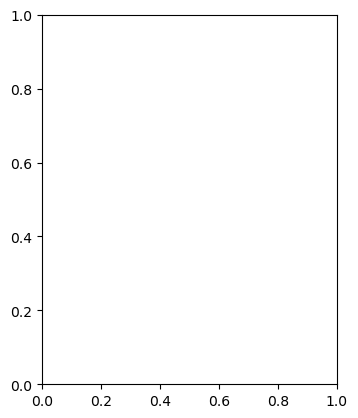

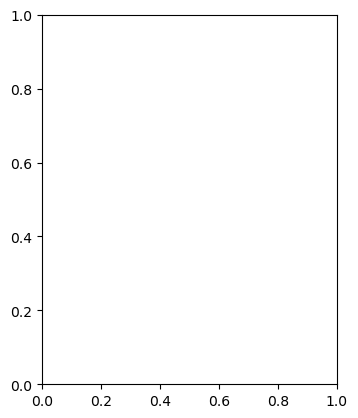

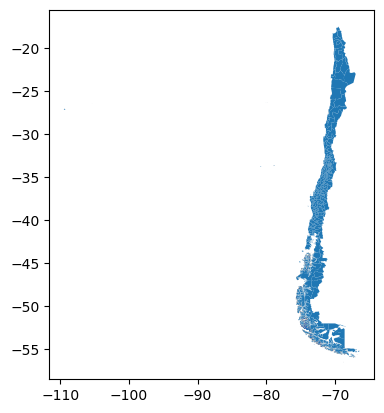

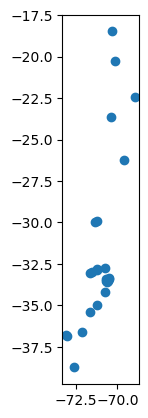

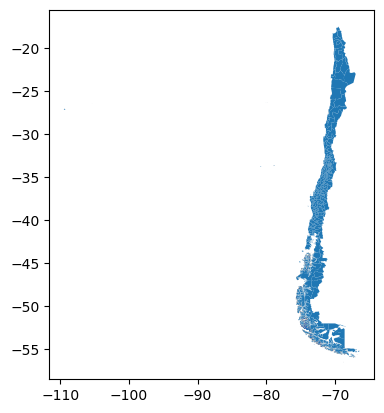

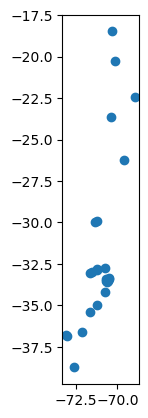

In [47]:
mapa = gpd.read_file('mpas\comunasChile.gpkg')
mapa.plot()
gpd_equipos.plot()
plt.show()


#### Referencias:
* ##### Tabla final de temporada:
  * ##### 2020 : https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_Chile_2020 
  * ##### 2019 : https://es.wikipedia.org/wiki/Primera_Divisi%C3%B3n_de_Chile_2019 
* ##### Datos de Estadio y asistencia
    * ##### Asistencia de público: http://www.estadioseguro.gob.cl/2019/01/04/asistencia-de-publico-a-los-estadios-marca-cifra-record-en-2018/
    * #####